In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [ ]:
df = pd.read_excel("/content/GRAB APP AND API DATA.xlsx", skiprows=13)

In [ ]:
df.columns

Index(['no.', 'route_id', 'date', 'app_booking hour', 'app_pick-up point',
       'app_destination', 'grab car 4-seater_published fare (in php)',
       'app_eta_min', 'app_eta_max', '"Beat high fares" note shown on app?',
       'gmaps1_time of route check', 'gmaps1_ride duration (in minutes)',
       'gmaps1_distance (km)', 'same route?', 'gmaps2_time of route check',
       'gmaps2_ride duration (in minutes)', 'gmaps2_distance (km)',
       'table fare', 'Fixed Date and Time (Manila)', 'Route (API)',
       'Service Name', 'ETA', 'ETT', 'MaxFare', 'MinFare', 'SurgeNotice',
       'Surge factor'],
      dtype='object')

In [ ]:
grouped = df.groupby('Route (API)')[['app_pick-up point', 'app_destination']].apply(lambda x: x.drop_duplicates()).reset_index(drop=True)
grouped

,app_pick-up point,app_destination
0,McDonald's Taft MRT Station North Bound,SM City North EDSA Main Entrance
1,Waltermart Bicutan Main Entrance,UP Alumni Hostel
2,University of Santo Tomas Main Building,Mall of Asia Arena Coral Way
3,Mile Long Bldg.,SM Aura Main Entrance
4,Valenzuela United Methodist Church,Puregold Paso de Blas
5,Fisher Mall Malabon Entrance,168 Shopping Mall - Main Entrance
6,Pasig City Hall Main Entrance,The Medical City Ortigas Main Lobby
7,JPMorgan Chase & Co. Main Entrance,One Orchard Road Eastwood
8,Las Pinas City Hall Main Entrance,Victory Liner - Pasay Terminal
9,Alabang Integrated Bus Terminal,Baclaran Church


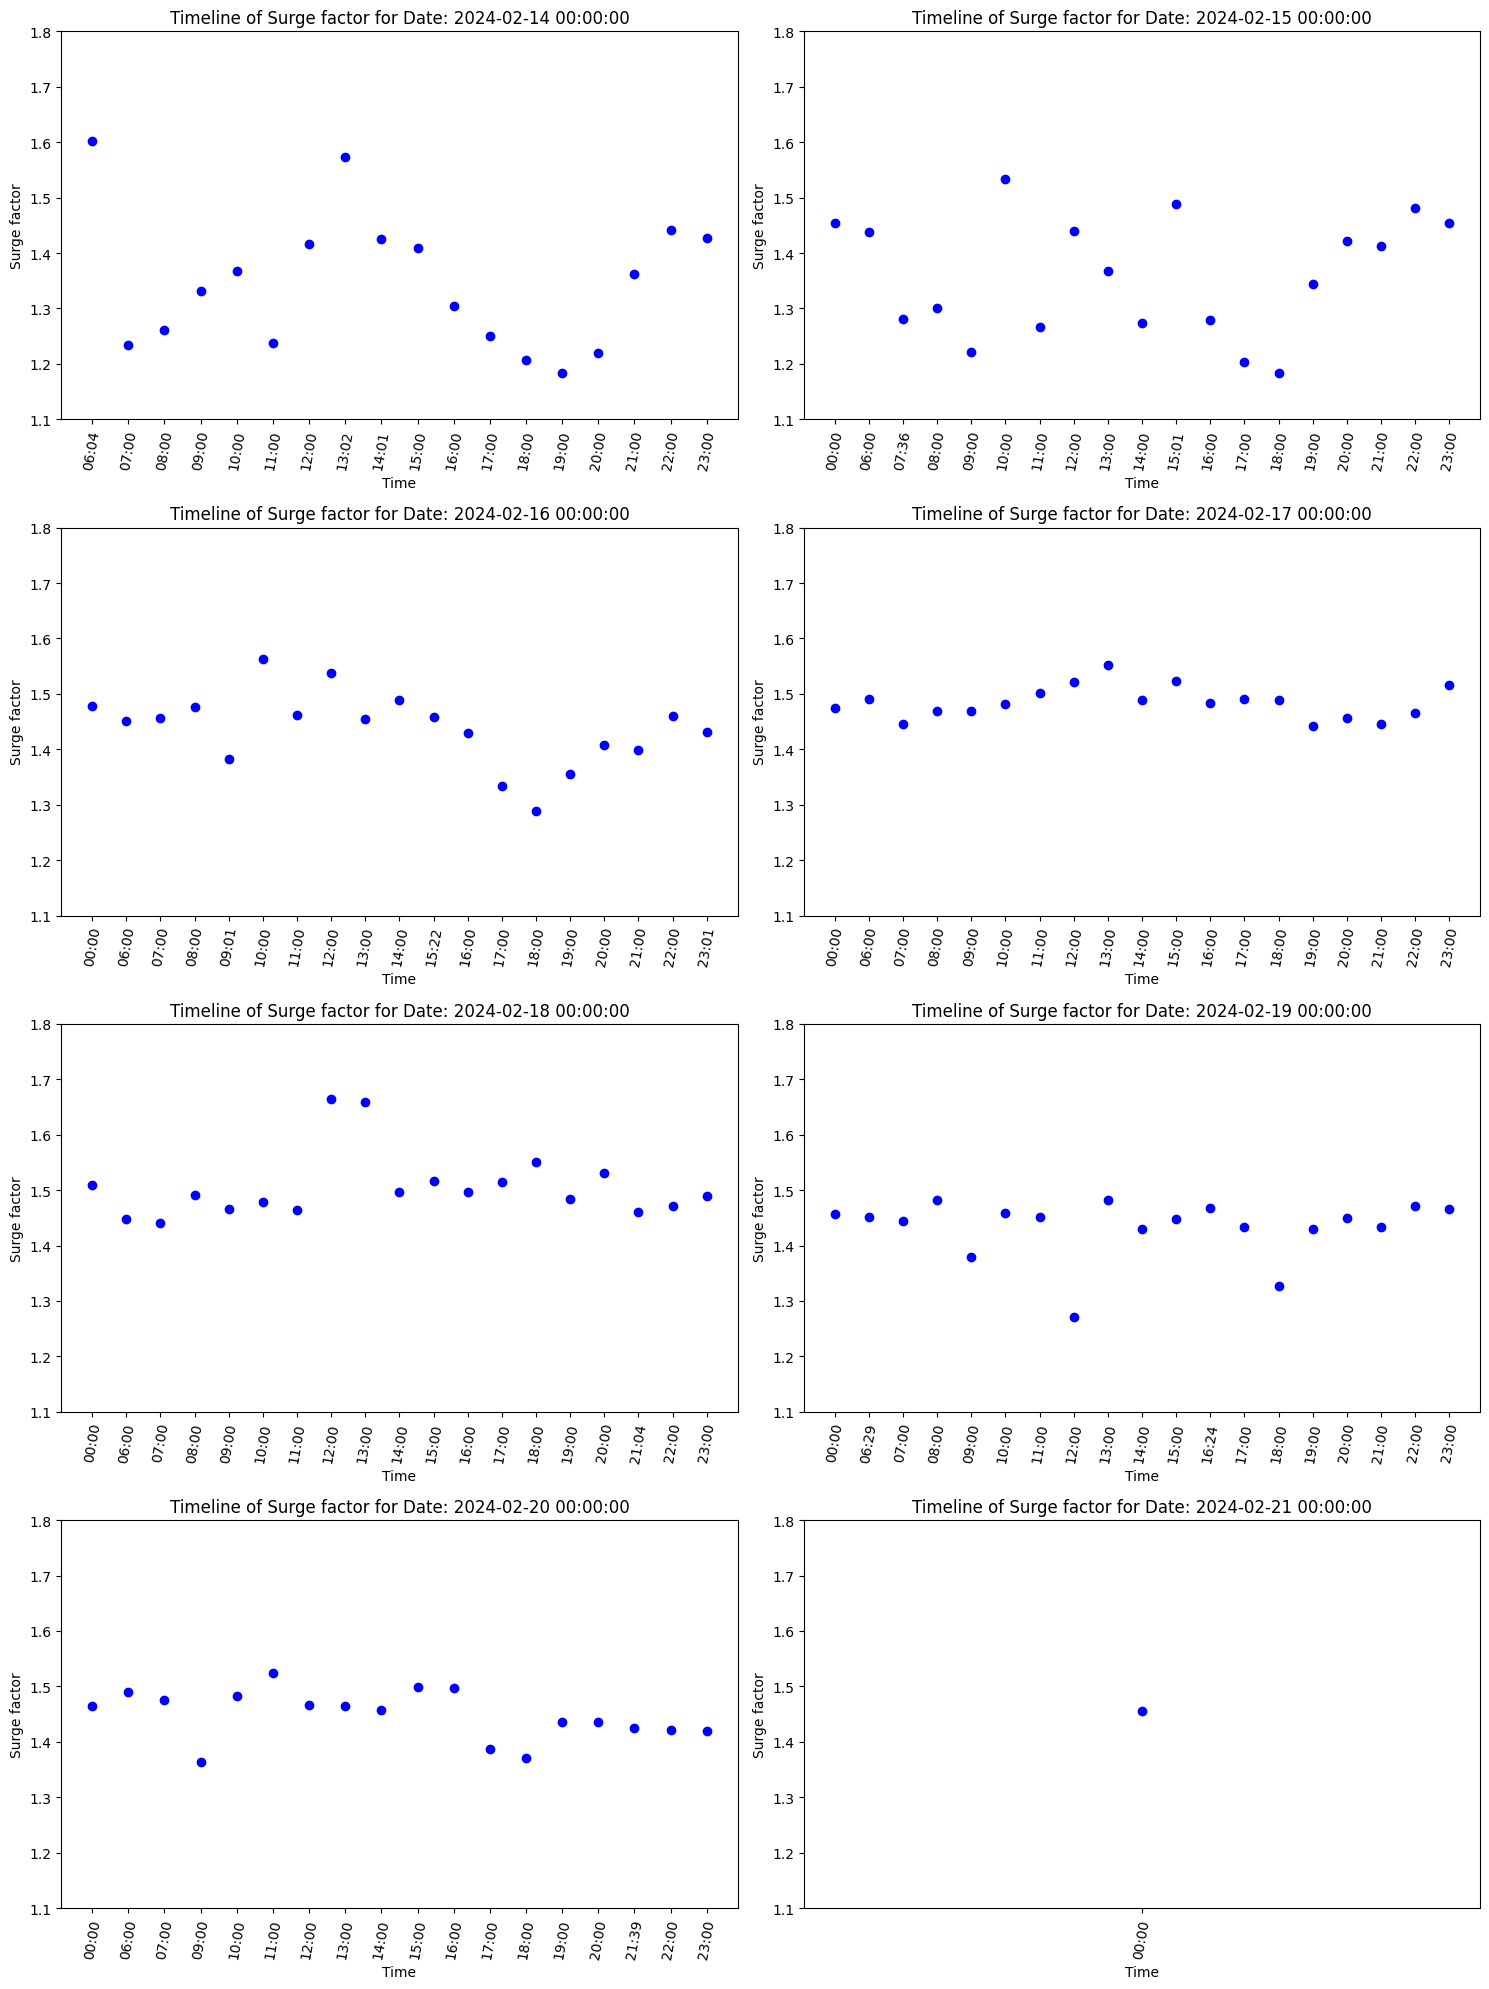

In [ ]:
df = df[(df['app_destination']=="UP Alumni Hostel")]

df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
grouped1 = df.groupby('date')

df['app_booking hour'] = df['app_booking hour'].astype(str).str[:-3]
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
for i, (date, group) in enumerate(grouped1):
    row = i // 2
    col = i % 2
    ax = axs[row, col]
    ax.scatter(group['app_booking hour'], group['Surge factor'], marker='o', linestyle='-', label=f'Date: {date}', color='b')
    ax.set_xlabel('Time')
    ax.set_ylabel('Surge factor')
    ax.set_title(f'Timeline of Surge factor for Date: {date}')
    ax.grid(False)
    # ax.legend()
    ax.tick_params(axis='x', labelrotation=80)
    # ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
    ax.set_ylim(1.1, 1.8)

plt.tight_layout()
plt.show()


Plots


* Surge factor vs time (can be split by location) *
* Published fare vs ETA
* Published fare vs ETT
* Surge factor split by Surge Notice (dichotomous)

